# 2023分组作业一及补充材料

# 上市公司报告

+ 数据来源：https://disk.pku.edu.cn:443/link/E0CCAF289B2EE63E1814580B57DE3A96
有效期限：2024-01-31 23:59
+ 截至时间： 2023年11月25日

+ 选择一个行业，或者地区（省份）上市公司作为研究对象
+ 描述性分析，汇总个各变量的分布，精选几个类别有代表性的数据进行介绍。 
+ 分析主营产品，统计感兴趣的主营产品公司的市场表现，比如可以构造指数。
+ 下面三个问题选两个完成，可以全市场进行，也可以选择一个地区或行业完成。对于问题中没有给出具体分析内容的，各小组自行讨论决定。
  1.  股东分析

    + 选择几个重要的投资机构（在A股持有大量股票），分析其持有资产的情况。
    + 选择特定的投资者（比如部分自然人），分析其持有资产的情况及变化。  
    + 构建股东网络，可以自行定义网络，比如共同持有同一家公司的股东之间画一条无向边，或者持有超过一定比例的投资者之间连一边。通过degree, between centrality 等指标分析股东关系。这里大家可以自行选择分析主题，比如寻找团，或者联系密切的子图；或者对子图的类型进行总结；或者对特定的结构和对应资产市场表现的关系。
  
  2.    公司管理层分析

     + 根据公司管理层数据，利用文本识别的方法，从简历识别特定信息，比如性别，最高学历，就读高校等，结合职位，年龄等信息，给出管理成报告，如果能结合公司基本财务资料分析更好。

  3.   量价分析  
  
     + 量价关系是技术分析的常用工具，通常有很多做形态（请自行搜素介绍）。然后至少选择其中一种形态，自行定义具体规则利用程序识别这种形态。选择若干只股票，对该形态出现的时点股票的未来收益进行分析。


##  文本处理
+ 可以在网上找材料，比如  [Python3 字符串 | 菜鸟教程](http://www.runoob.com/python3/python3-string.html)
+  对文本数据，比如产品类别和主要产品，利用split方法可以分解后进行分析统计，比如

In [1]:
import pandas as pd

下面代码读入基本资料数据，将主营产品名称字段分解，取出所有主营产品。

In [2]:
stockinfo=pd.read_excel("E:\\teaching\\Windexport\\stockinfo.xlsx")
p=stockinfo["主营产品名称"]
x=[]
for  pr in p.values:
    if not pd.isnull(pr):
        x.extend(pr.split(sep="、"))
len(x),len(pd.unique(x))

(35757, 34764)

In [3]:
p.head()

0    发展保险业务、发展出口信用证、发展存贷款业务、发展跟单托收、发展光票托收、发展贵宾卡、发展国...
1    常平万科城[东莞市]、成都万科城市花园、成都万科金色家园、南昌万科四季花城、南京万科金色家园...
2    北大高科指纹自动识别系统、国农克林霉素磷酸酯、国农门冬氨酸钾镁、国农水溶性维生素、国农物业管...
3    HTC技术服务、超级能源广场、纯电动车租赁经营、固废处理服务、绿色建筑技术服务、区域余热分级...
4    惠阳·振业城、惠阳·振业城商务中心、深圳业振业大厦、深圳振业城、深振业宝荷城、深振业翠海花园...
Name: 主营产品名称, dtype: object

In [4]:
x= stockinfo["省份"]
pd.value_counts(x)

广东省         581
浙江省         426
江苏省         395
北京          315
上海          283
山东省         193
福建省         131
四川省         120
安徽省         104
湖南省         103
湖北省          99
河南省          78
辽宁省          73
河北省          56
新疆维吾尔自治区     54
天津           50
重庆           49
陕西省          47
吉林省          41
江西省          40
山西省          38
广西壮族自治区      37
黑龙江省         36
云南省          33
甘肃省          33
海南省          31
贵州省          29
内蒙古自治区       25
西藏自治区        17
宁夏回族自治区      13
青海省          12
Name: 省份, dtype: int64

可以进一步分析分布，比如选出频数最高的。

In [5]:
# 查找
sStr1 = 'abcdefg'
sStr2 = 'cde'
print(sStr1.find(sStr2))

2


## 饼图

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
## 如果中文是乱码，可以写入下面两行
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置  
plt.rcParams['axes.unicode_minus'] = False  

stockinfo=pd.read_excel("E:\\teaching\\Windexport\\stockprodatt.xlsx")
stockinfo.columns = stockinfo.columns.map(lambda x:x.split("\r")[0])


In [7]:
stockinfo.columns

Index(['证券代码', '证券简称', '主营产品类型', '主营产品名称', '公司属性'], dtype='object')

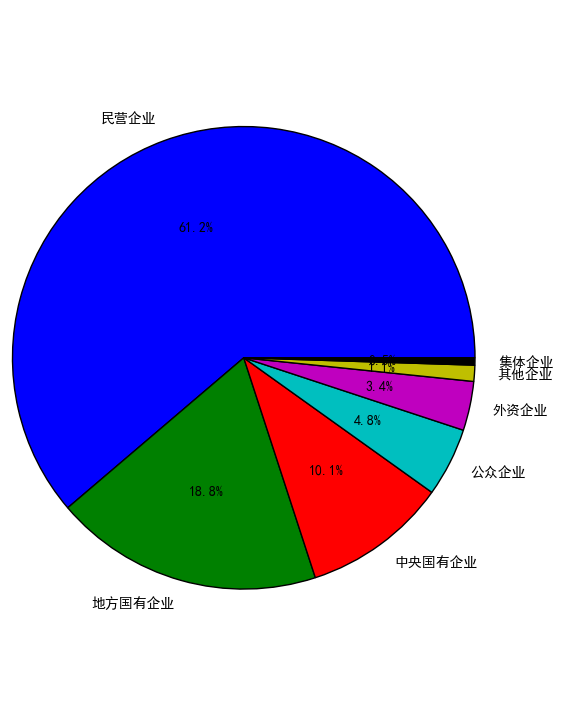

In [8]:
gssx=stockinfo["公司属性"]
gssxc=pd.value_counts(gssx)
labss=pd.Series(gssxc.index).values 
plt.figure(figsize=(6,9)) 
plt.pie(gssxc,labels=labss,autopct = '%3.1f%%')
plt.axis('equal') 
plt.show()

饼图的更详细画法

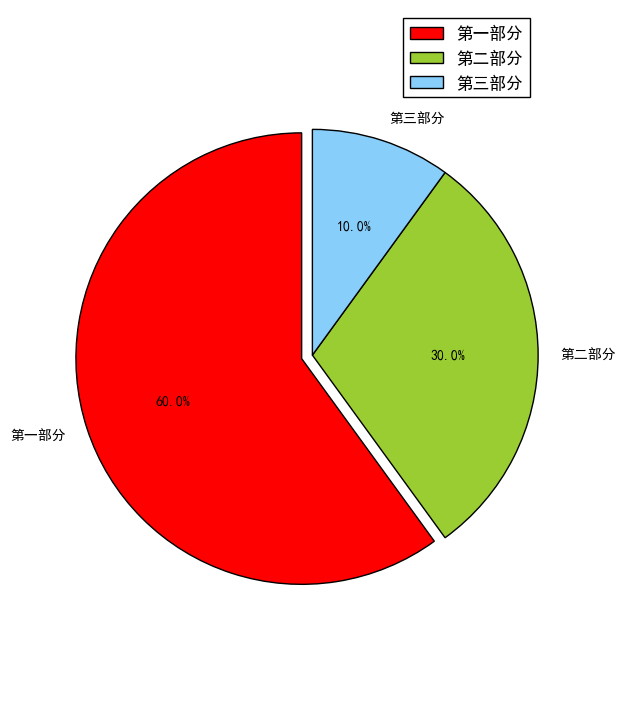

In [9]:
from matplotlib import pyplot as plt
#调节图形大小，宽，高 
plt.figure(figsize=(6,9)) 
#定义饼状图的标签，标签是列表 
labels = [u'第一部分',u'第二部分',u'第三部分'] 
#每个标签占多大，会自动去算百分比 
sizes = [60,30,10] 
colors = ['red','yellowgreen','lightskyblue'] 
#将某部分爆炸出来， 使用括号，将第一块分割出来，数值的大小是分割出来的与其他两块的间隙 
explode = (0.05,0,0) 
patches,l_text,p_text = plt.pie(sizes,explode=explode,labels=labels,colors=colors, labeldistance = 1.1,autopct = '%3.1f%%',shadow = False, startangle = 90,pctdistance = 0.6) 
#labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
#autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数 
#shadow，饼是否有阴影
#startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看 
#pctdistance，百分比的text离圆心的距离 #patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本 #改变文本的大小 
#方法是把每一个text遍历。调用set_size方法设置它的属性 
for t in l_text:
    t.set_size=(30) 
for t in p_text: 
    t.set_size=(20) 
# 设置x，y轴刻度一致，这样饼图才能是圆的 
plt.axis('equal') 
plt.legend() 
plt.show()



## 词云

In [4]:

prodatt=stockinfo["主营产品类型"]
x=[]
for  pr in prodatt.values:
    if not pd.isnull(pr):
        x.extend(pr.split(sep="、"))

def countWords(A):
    dic={}
    for x in A:
        if not x in  dic: 
            dic[x] = A.count(x)
    return dic
freqatt=countWords(x)


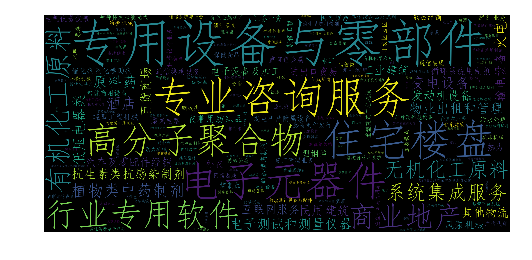

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 

# the font from github: https://github.com/adobe-fonts
font = r'C:\Windows\Fonts\simfang.ttf'
wc = WordCloud(collocations=False, font_path=font, width=3000, height=1400, margin=2).generate_from_frequencies(freqatt)
plt.imshow(wc)
plt.axis("off")
plt.show()

## 网络图分析的概念和方法
参考书：[Python for Graph and Network Analysis][book] 
[book]: networkanapython.pdf  

下面是一些简单用法
+ 图的生成，增减结点，边，路径，画图,保存为png

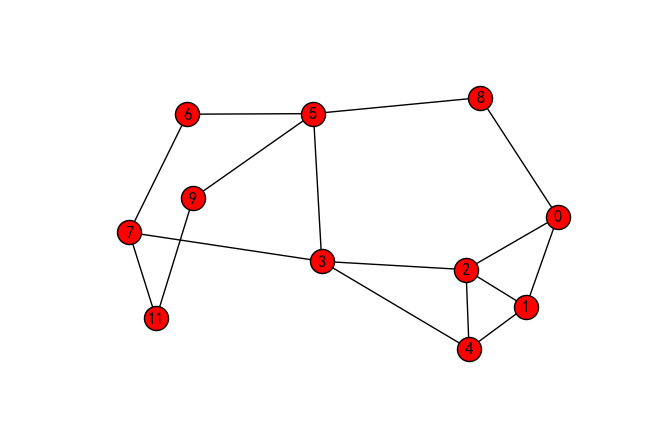

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

G=nx.Graph()

# adding nodes
G.add_node("my node")
G.add_nodes_from(range(1,10))

# removing nodes

G.remove_node("my node")
G.remove_nodes_from([(1,2),(2,3)])

# adding and removing edges

G.add_edge(5,11)
G.remove_edge(5,11)
G.add_weighted_edges_from([(0,1,3.0),(1,4,7.5)])
G.add_path([1,2,3,4,2,0,8,5,6,7,11,9,5,3,7])

nx.draw(G,with_labels=True)
plt.savefig("test.png")
#plt.savefig("test.pdf")
plt.draw()
plt.show()


对结点的一些统计度量和概念

+ 度 degree
   + $d(i)=\sum_jm_{ij}$，
   + 描述有多少条边和i相连。
+ 度中心性 closeness centrality
   + $C(i)=\sum_jd_{ij}$，
   + 描述其它点到i的距离和
+ 中心度 between centrality
   + $b(i)=\sum_{j,k}\frac{g_{jik}}{g_{jk}}$,$g_{jk}$是从j到k的最短路径，$g_{jik}$是从j到k且经过i的最短路径。
   + 描述结点i在整个图中相互联通的作用。如果任意两个结点的联通都要经过i，比如以i为中心的星图，b(i)取最小，i最重要。
+ 团,完全子图
+ k-cores,最大的子图，其中每个结点至少k条边相连

In [13]:
G.degree()
nx.closeness_centrality(G)
nx.betweenness_centrality(G)

{0: 0.07851851851851852,
 1: 0.018518518518518517,
 2: 0.13111111111111112,
 3: 0.3770370370370371,
 4: 0.05703703703703703,
 5: 0.33185185185185184,
 6: 0.022222222222222223,
 7: 0.16444444444444445,
 8: 0.09703703703703705,
 9: 0.05555555555555556,
 11: 0.022222222222222223}

寻找以一个点为中心的子图，画出邻居

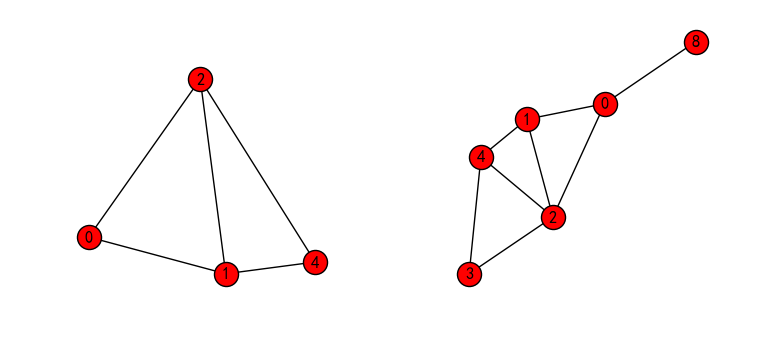

In [14]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
# 到1距离为1的所有点
egx=nx.ego_graph(G, 1, 1)
nx.draw(egx,with_labels=True)
plt.subplot(122)
# 到1距离小于等于2的所有点
egx=nx.ego_graph(G, 1, 2)
myplot=nx.draw(egx,with_labels=True)
plt.draw()
plt.show()

查找团，生成子图

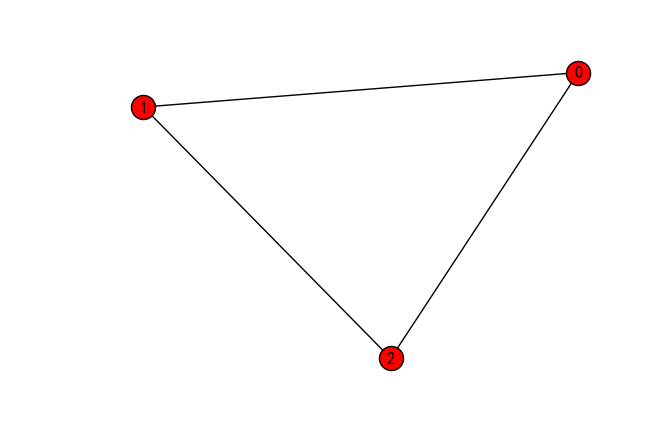

In [15]:
cliques = [x for x in nx.find_cliques(G)]
subg=nx.subgraph(G,cliques[0])
position = nx.circular_layout(G)
nx.draw(subg,position=position,with_labels=True)
plt.draw()
plt.show()


图的进一步设定

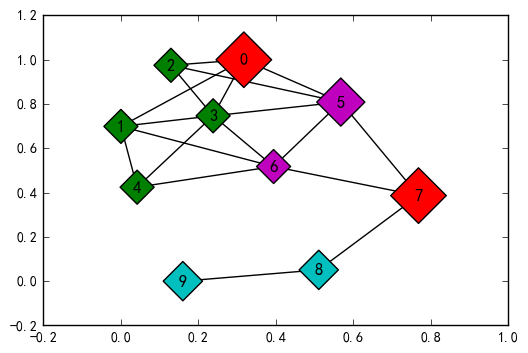

In [16]:
g = nx.krackhardt_kite_graph()
#设定每个点的位置，
position = nx.circular_layout(g)
#可以以此为基础进一步修改position
#每个结点的颜色
colors = ['r', 'g', 'g', 'g', 'g', 'm', 'm', 'r', 'c', 'c']
#大小
sizes =  [800, 300, 300, 300, 300, 600, 300, 800, 400, 400]
# 标记
labels = {0: '0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7',
8:'8', 9:'9'}
nx.draw_networkx(g,position=position, node_color=colors, 
node_shape='D',with_labels=True, labels=labels,node_size=sizes)
# node_shape="D" 指定为 diamond 方块
plt.show()

In [17]:
position

{0: array([ 1.,  0.]),
 1: array([ 0.80901699,  0.58778525]),
 2: array([ 0.30901699,  0.95105652]),
 3: array([-0.30901699,  0.95105652]),
 4: array([-0.80901699,  0.58778525]),
 5: array([ -1.00000000e+00,   1.22464680e-16]),
 6: array([-0.80901699, -0.58778525]),
 7: array([-0.30901699, -0.95105652]),
 8: array([ 0.30901699, -0.95105652]),
 9: array([ 0.80901699, -0.58778525])}